In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
city_data_to_load = 'Resource/city_data.csv'
ride_data_to_load = 'Resource/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

In [12]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [16]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [17]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [18]:
#Creating Urban city Data frame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [19]:
#Creating Suburban city Data frame
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [20]:
#Creating Rural city Data frame
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [22]:
# Get the number of rides for Suburban cities
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head(10)

city
Barronchester      16
Bethanyland        18
Brandonfort        19
Colemanland        22
Davidfurt          17
East Aaronbury      9
East Danielview    17
East Kentstad      13
East Marymouth     27
Grayville          15
Name: ride_id, dtype: int64

In [23]:
# Get the number of rides for Rural cities
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head(10)

city
Bradshawfurt       10
Garzaport           3
Harringtonfort      6
Jessicaport         6
Lake Jamie          6
Lake Latoyabury    11
Michaelberg        12
New Ryantown        6
Newtonview          4
North Holly         9
Name: ride_id, dtype: int64

In [24]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [25]:
# Get average fare for each city in the Suburban cities.
suburbun_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
suburbun_avg_fare.head(10)

city
Barronchester      36.422500
Bethanyland        32.956111
Brandonfort        35.437368
Colemanland        30.894545
Davidfurt          31.995882
East Aaronbury     25.661111
East Danielview    31.560588
East Kentstad      29.823077
East Marymouth     30.835185
Grayville          27.763333
Name: fare, dtype: float64

In [26]:
# Get average fare for each city in the Rural cities.
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
rural_avg_fare.head(10)

city
Bradshawfurt       40.064000
Garzaport          24.123333
Harringtonfort     33.470000
Jessicaport        36.013333
Lake Jamie         34.358333
Lake Latoyabury    26.061818
Michaelberg        34.997500
New Ryantown       43.278333
Newtonview         36.745000
North Holly        29.130000
Name: fare, dtype: float64

In [27]:
# Get average drivers for each city in the Urban cities.
urban_avg_drivers = urban_cities_df.groupby("city").mean()["driver_count"]
urban_avg_drivers.head(10)

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
East Kaylahaven    65.0
Erikaland          37.0
Grahamburgh        61.0
Huntermouth        37.0
Hurleymouth        36.0
Name: driver_count, dtype: float64

In [28]:
# Get average drivers for each city in the Suburban cities.
suburban_avg_drivers = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_avg_drivers.head(10)

city
Barronchester      11.0
Bethanyland        22.0
Brandonfort        10.0
Colemanland        23.0
Davidfurt          23.0
East Aaronbury      7.0
East Danielview    22.0
East Kentstad      20.0
East Marymouth      5.0
Grayville           2.0
Name: driver_count, dtype: float64

In [29]:
# Get average drivers for each city in the Rural cities.
rural_avg_drivers = rural_cities_df.groupby("city").mean()["driver_count"]
rural_avg_drivers.head(10)

city
Bradshawfurt       7.0
Garzaport          7.0
Harringtonfort     4.0
Jessicaport        1.0
Lake Jamie         4.0
Lake Latoyabury    2.0
Michaelberg        6.0
New Ryantown       2.0
Newtonview         1.0
North Holly        8.0
Name: driver_count, dtype: float64

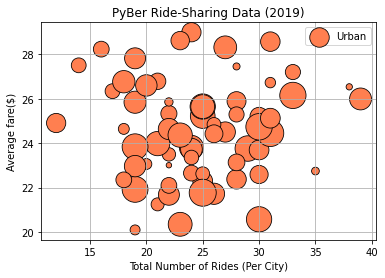

In [30]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, color="coral", edgecolor = "Black", linewidths = 0.8, alpha=1, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

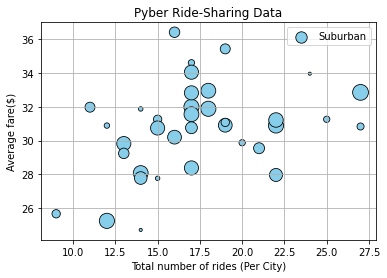

In [31]:
# Build the scatter plots for Suburban cities.
plt.scatter(suburban_ride_count, suburbun_avg_fare, s=10*suburban_avg_drivers, color="skyblue", edgecolor="Black", linewidths=0.8, alpha=1, label="Suburban")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average fare($)")
plt.title("Pyber Ride-Sharing Data")
plt.legend()
plt.grid()

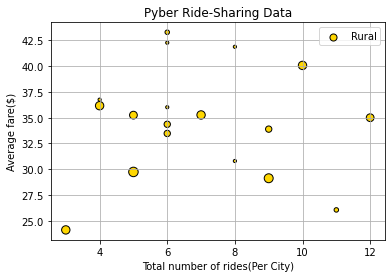

In [32]:
# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, color="gold", linewidths=1, alpha=1, edgecolor="Black", label="Rural")
plt.xlabel("Total number of rides(Per City)")
plt.ylabel("Average fare($)")
plt.title("Pyber Ride-Sharing Data")
plt.legend()
plt.grid()

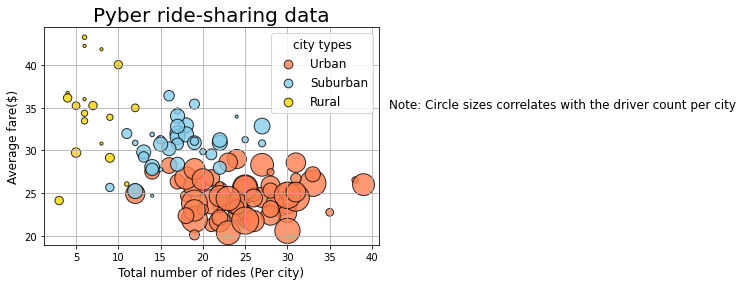

In [33]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, color="coral", edgecolor = "Black", linewidths = 1, alpha=0.8, label="Urban")


plt.scatter(suburban_ride_count, suburbun_avg_fare, s=10*suburban_avg_drivers, color="skyblue", edgecolor="Black", linewidths=1, alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, color="gold", linewidths=1, alpha=0.8, edgecolor="Black", label="Rural")

plt.xlabel("Total number of rides (Per city)", fontsize=12)
plt.ylabel("Average fare($)", fontsize=12)
plt.title("Pyber ride-sharing data", fontsize=20)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="city types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, "Note: Circle sizes correlates with the driver count per city", fontsize="12")
plt.show()

In [34]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [35]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [36]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [37]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [38]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [39]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [40]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [41]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [42]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts of urban trips is {mean_urban_ride_count:.2f}.")

The mean for the ride counts of urban trips is 24.62.


In [43]:
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts of urban trips is {median_urban_ride_count}.")

The median for the ride counts of urban trips is 24.0.


In [44]:
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts of urban trips is {mode_urban_ride_count}.")

The mode for the ride counts of urban trips is ModeResult(mode=array([22]), count=array([7])).


In [45]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts of suburban trip is {mean_suburban_ride_count:.2f}.")

The mean for the ride counts of suburban trip is 17.36.


In [46]:
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the side counts of rural trip is {median_suburban_ride_count}")

The median for the side counts of rural trip is 17.0


In [47]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the side counts of rural trip is {mode_suburban_ride_count}")

The mode for the side counts of rural trip is ModeResult(mode=array([17]), count=array([7]))


In [48]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride count of rural trip is {mean_rural_ride_count:.2f}.")

The mean for the ride count of rural trip is 6.94.


In [49]:
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride count of rural trip is {median_rural_ride_count}.")

The median for the ride count of rural trip is 6.0.


In [50]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count of rural trip is {mode_rural_ride_count}.")

The mode for the ride count of rural trip is ModeResult(mode=array([6]), count=array([5])).


In [51]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head(10)

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
5     9.52
6    43.25
7    35.98
8    35.09
9    42.81
Name: fare, dtype: float64

In [52]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean urban fare is {mean_urban_fares:.2f}.")

The mean urban fare is 24.53.


In [53]:
median_urban_fare = np.median(urban_fares)
print(f"The median urban fare is {median_urban_fare}.")

The median urban fare is 24.64.


In [54]:
mode_urban_fare = sts.mode(urban_fares)
print(f"The mode of Urban fare is {mode_urban_fare}")

The mode of Urban fare is ModeResult(mode=array([22.86]), count=array([5]))


In [55]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head(10)

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
1630    37.60
1631    20.44
1632    46.51
1633    44.74
1634    28.02
Name: fare, dtype: float64

In [56]:
mean_suburban_fare = np.mean(suburban_fares)
print(f"The mean of suburban fare is {mean_suburban_fare:.2f}.")

The mean of suburban fare is 30.97.


In [57]:
median_suburban_fare = np.median(suburban_fares)
print(f"The median of suburban fare is {median_suburban_fare:.2f}.")

The median of suburban fare is 30.75.


In [58]:
mode_suburban_fare = sts.mode(suburban_fares)
print(f"The median of suburban fare is {mode_suburban_fare}.")

The median of suburban fare is ModeResult(mode=array([17.99]), count=array([3])).


In [59]:
# Get the fares for the suburban cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head(10)

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
2255    45.31
2256    36.16
2257    42.68
2258    13.46
2259    39.46
Name: fare, dtype: float64

In [60]:
mean_rural_fare = np.mean(rural_fares)
print(f"The mean of rural fare is {mean_rural_fare:.2f}.")

The mean of rural fare is 34.62.


In [61]:
median_rural_fare = np.mean(rural_fares)
print(f"The median of rural fare is {median_rural_fare:.2f}.")

The median of rural fare is 34.62.


In [62]:
mode_rural_fare = sts.mode(rural_fares)
print(f"The mode of rural fare is {mode_rural_fare}.")

The mode of rural fare is ModeResult(mode=array([37.05]), count=array([2])).


In [63]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head(10)

0     5
1    72
2    57
3    34
4    46
5    10
6    44
7    21
8     4
9    33
Name: driver_count, dtype: int64

In [64]:
mean_urban_driver = np.mean(urban_drivers)
print(f"The mean of urban driver count is {mean_urban_driver:.2f}.")

The mean of urban driver count is 36.68.


In [65]:
median_urban_driver = np.median(urban_drivers)
print(f"The median of urban driver count is {median_urban_driver:.2f}.")

The median of urban driver count is 37.00.


In [66]:
mode_urban_driver = sts.mode(urban_drivers)
print(f"The mode of urban driver count is {mode_urban_driver}.")

The mode of urban driver count is ModeResult(mode=array([39]), count=array([86])).


In [67]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head(10)

1625    11
1626    20
1627    22
1628    19
1629    12
1630     5
1631    17
1632     4
1633    25
1634    10
Name: driver_count, dtype: int64

In [68]:
mean_suburban_driver = np.mean(suburban_drivers)
print(f"The mean of suburban driver count is {mean_suburban_driver:.2f}.")

The mean of suburban driver count is 13.71.


In [69]:
median_suburban_driver = np.median(suburban_drivers)
print(f"The median of suburban driver count is {median_suburban_driver:.2f}.")

The median of suburban driver count is 16.00.


In [70]:
mode_suburban_driver = sts.mode(suburban_drivers)
print(f"The mode of suburban driver count is {mode_suburban_driver}.")

The mode of suburban driver count is ModeResult(mode=array([20]), count=array([79])).


In [71]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head(10)

2250    9
2251    8
2252    6
2253    2
2254    2
2255    1
2256    7
2257    2
2258    2
2259    8
Name: driver_count, dtype: int64

In [72]:
mean_rural_driver = np.mean(rural_drivers)
print(f"The mean of rural driver count is {mean_rural_driver:.2f}.")

The mean of rural driver count is 4.30.


In [73]:
median_rural_driver = np.median(rural_drivers)
print(f"The median of rural driver count is {median_rural_driver:.2f}.")

The median of rural driver count is 4.00.


In [74]:
mode_rural_driver = sts.mode(rural_drivers)
print(f"The mode of rural driver count is {mode_rural_driver}.")

The mode of rural driver count is ModeResult(mode=array([1]), count=array([32])).


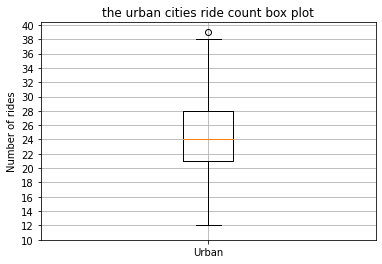

In [75]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("the urban cities ride count box plot")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

In [76]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

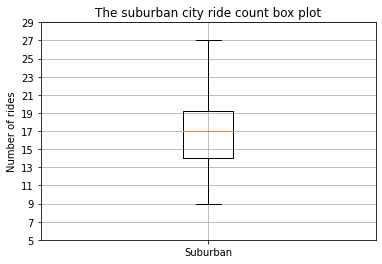

In [77]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels=["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title("The suburban city ride count box plot")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(5.0,30.0, step=2.0))
ax.grid()
plt.show()

In [78]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

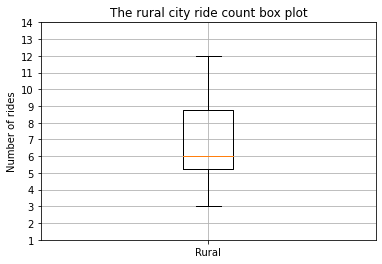

In [79]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels=["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("The rural city ride count box plot")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(1,15, step=1.0))
ax.grid()
plt.show()

In [80]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

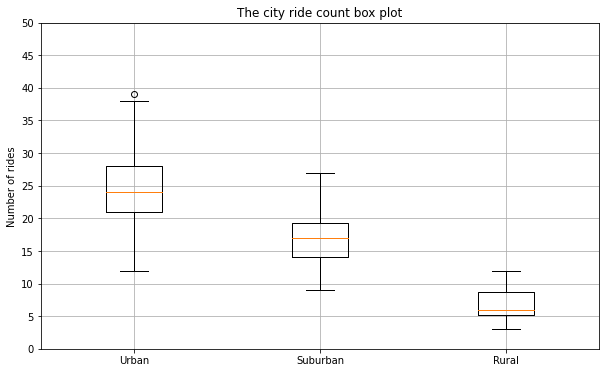

In [81]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title("The city ride count box plot")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(0,51, step=5))
ax.grid()
plt.savefig("Resource/fig2.png")
plt.show()


In [82]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


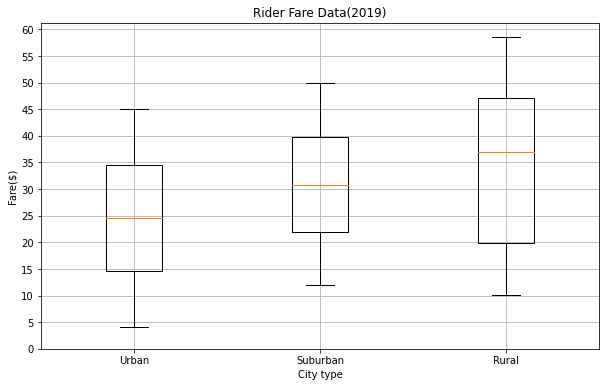

In [83]:
# Create a box-and-whisker plot for the city type fare data.
x_labels=["Urban", "Suburban", "Rural"]
city_fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(city_fares_data, labels=x_labels)
ax.set_title("Rider Fare Data(2019)")
ax.set_ylabel("Fare($)")
ax.set_xlabel("City type")
ax.set_yticks(np.arange(0,61, step=5))
ax.grid()
plt.savefig("Resource/fig3.png")
plt.show()

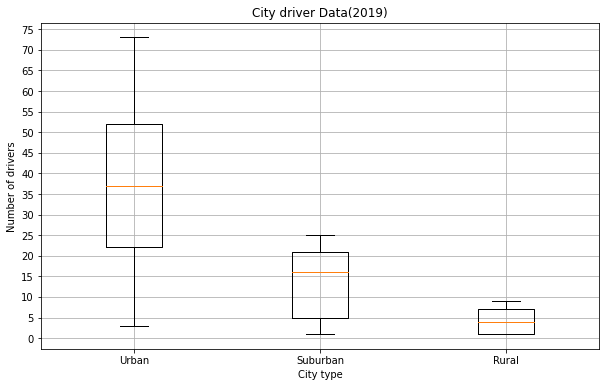

In [84]:
# Create the box-and-whisker plot for the city driver count data.
x_labels=["Urban", "Suburban", "Rural"]
city_driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(city_driver_data, labels=x_labels)
ax.set_title("City driver Data(2019)")
ax.set_ylabel("Number of drivers")
ax.set_xlabel("City type")
ax.set_yticks(np.arange(0,80, step=5))
ax.grid()
plt.savefig("Resource/fig4.png")
plt.show()

In [85]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fares_by_type.head(10)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [86]:
# Get the sum of all the fares.
total_fares = pyber_data_df.sum()["fare"]
total_fares

63538.64

In [87]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type/total_fares

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [88]:
type_percents1 = 100 * pyber_data_df.groupby("type").sum()["fare"]/pyber_data_df.sum()["fare"]
type_percents1

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

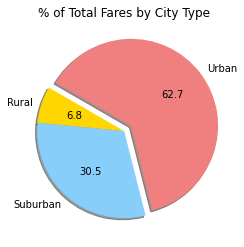

In [89]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], colors = ["gold","lightskyblue","lightcoral"], explode=[0,0,0.1],autopct="%1.1f", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size']=30
plt.savefig("Resource/fig5.png")
plt.show()

In [90]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [91]:
# Get the sum of the rides for each city type.
total_ride_by_type = pyber_data_df.groupby("type").count()["ride_id"]
total_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [92]:
#Calculate total ride for all city types
total_rides = pyber_data_df.count()["ride_id"]
total_rides

2375

In [93]:
# Build the percentage of rides by city type pie chart.
total_rides_percentage = 100 * total_ride_by_type/total_rides
total_rides_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

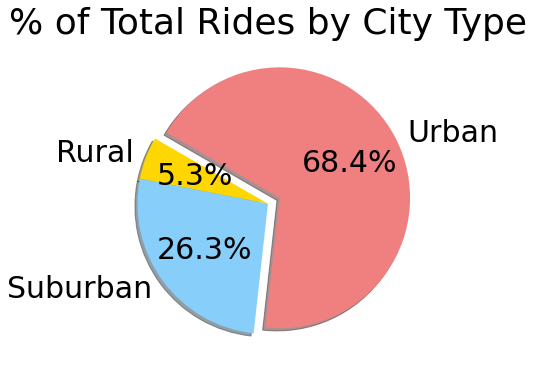

In [94]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(total_rides_percentage, labels=["Rural","Suburban","Urban"], colors=["gold","lightskyblue","lightcoral"],explode =[0,0,0.1], autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size']=40
plt.savefig("Resource/Fig7.png")
plt.show()

In [95]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [96]:
#Get the total number of drivers for each city type.
total_driver_by_type = pyber_data_df.groupby("type").sum()["driver_count"]
total_driver_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [97]:
#Get the total drivers for all the city types.
total_drivers = pyber_data_df["driver_count"].sum()
total_drivers

68709

In [99]:
#Calculate the percentage of the total drivers for each city type.
total_driver_by_type_perct = 100 * pyber_data_df.groupby("type").sum()["driver_count"]/pyber_data_df["driver_count"].sum()
total_driver_by_type_perct

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

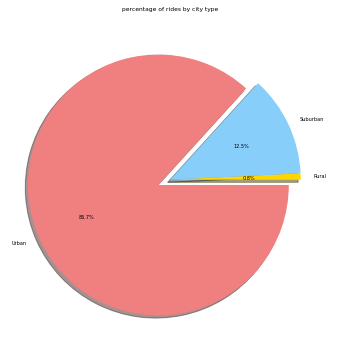

In [114]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(total_driver_by_type_perct, labels=["Rural","Suburban","Urban"], colors=["gold","lightskyblue","lightcoral"], shadow=True, explode=[0,0,0.1], autopct="%1.1f%%")
plt.title("percentage of rides by city type")
mpl.rcParams['font.size']=5
plt.savefig('Resource/fig8.png')
plt.show()